In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
X = pd.read_csv("G:\Coding Blocks\Documents\logisticX.csv")
Y = pd.read_csv("G:\Coding Blocks\Documents\logisticY.csv")
x = X.values
y = Y.values
print(X.shape,type(X))
print(Y.shape)
print()
print(x.shape,type(x))
print(y.shape,type(y))

(99, 2) <class 'pandas.core.frame.DataFrame'>
(99, 1)

(99, 2) <class 'numpy.ndarray'>
(99, 1) <class 'numpy.ndarray'>


In [6]:
plt.style.use("seaborn")

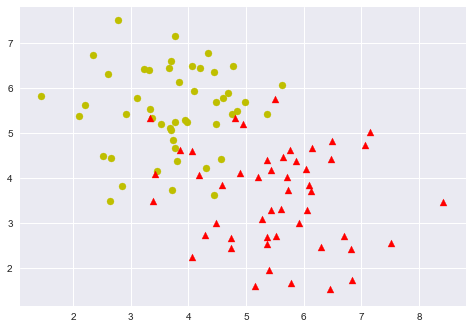

In [7]:
y = y.reshape((99))
for i in range(y.shape[0]):
    if y[i]==0:
        plt.scatter(x[i,0],x[i,1],c='y')
    else:
        plt.scatter(x[i,0],x[i,1],c='r',marker='^')
plt.show()

# Implementation of Logistic Regression Algorithm

In [8]:
def hypothesis(x,theta,bias):
    result = bias + np.dot(x,theta)
    return sigmoid(result)

def sigmoid(a):
    return 1.0/(1.0 + np.exp(-1.0*a))   # Use floats for accurate results

def error(x,theta,y,bias):
    it = x.shape[0]
    e = 0.0
    for i in range(it):
        h = hypothesis(x[i],theta,bias)
        e += y[i]*np.log2(h) + (1-y[i])*np.log2(1-h)
    return -e/it

def grad(x,y,theta,bias,batch_size = 1):
    it = x.shape[0]
    indices = np.arange(it)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    g =  np.zeros(theta.shape)
    g_b = 0.0
    for i in indices:
        h = hypothesis(x[i],theta,bias)
        g += (y[i] - h)*x[i]
        g_b += (y[i] - h)
    g /= it
    g_b /= it
    return (g,g_b)

def grad_des(x,y,theta,bias,learning_rate = 0.1):
    e =  error(x,theta,y,bias)
    g,g_b = grad(x,y,theta,bias)
    theta = theta + learning_rate*g
    bias = bias + learning_rate*g_b
    return theta,bias,e

def predict(x,theta,bias):
    
    confidence = hypothesis(x,theta,bias)
    if confidence<0.5:
        return 0
    else:
        return 1
    

    


        


# RANDOM TESTING AND STUFF NOT TO BE GIVEN ATTENTION BY READER OF CODE:
            # s = np.array([1,2])
            # d = np.array([[1,1],[2,3],[4,3],[5,5]])
            # print(np.sum(s*d[1]))

In [9]:
loss = []
theta = np.random.random((x.shape[1],))
bias = np.random.random()

In [26]:
for i in range(2000):
    t,b,l = grad_des(x,y,theta,bias)
    theta = t
    bias = b
    loss.append(l)
    

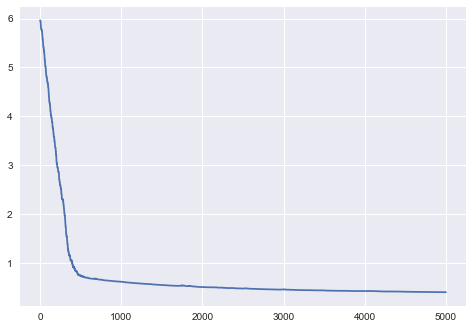

In [27]:
plt.plot(loss)
# print(loss)

# Accuracy  Function
- we compare results of predict function and y_test

In [28]:
def accuracy(x_test,y_test,theta,bias):
    y_p = []
    it = y_test.shape[0]
    for i in range(it):
        p = predict(x_test[i],theta,bias)
        y_p.append(p)
    y_p = np.array(y_p)
    temp = y_p==y_test
    temp = float(temp.sum())
    temp = temp/it
    return temp


In [29]:
# p = np.array([1,0,1,1])
# z = np.array([1,1,1,1])
# print((p==z).sum())
ac = accuracy(x,y,theta,bias)
print(ac)

0.898989898989899


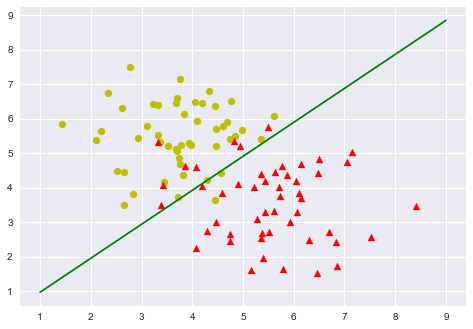

In [35]:
for i in range(y.shape[0]):
    if y[i]==0:
        plt.scatter(x[i,0],x[i,1],c='y')
    else:
        plt.scatter(x[i,0],x[i,1],c='r',marker='^')
        
x1 = np.linspace(1,9,10)
y1 = -(theta[0]*x1 + b)/theta[1]
plt.plot(x1,y1,color ='g')
plt.show()

# Using Sklearn Library

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)
print(theta)
print(bias)

[[ 1.55849395 -1.54084759]]
[0.06111789]
[ 0.90605889 -0.92008713]
-0.015530311714674453


In [34]:
print(model.score(x,y))

0.8686868686868687


Sklearn (Black) vs Built Algorithm (Green)


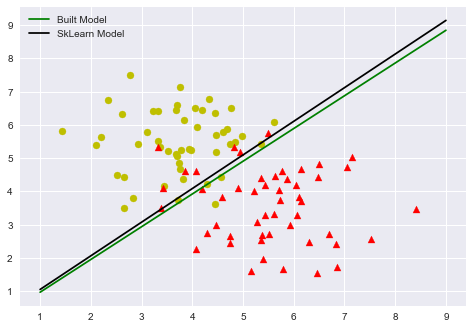

In [58]:
for i in range(y.shape[0]):
    if y[i]==0:
        plt.scatter(x[i,0],x[i,1],c='y')
    else:
        plt.scatter(x[i,0],x[i,1],c='r',marker='^')
        
x1 = np.linspace(1,9,10)
y1 = -(theta[0]*x1 + b)/theta[1]
theta_m = model.coef_
theta_m = theta_m.reshape((2,))
bias_m = model.intercept_
bias_m = bias_m[0]
y2 = -(theta_m[0]*x1 + bias_m)/theta_m[1]
plt.plot(x1,y1,color ='g',label = 'Built Model') #label = 'Built Model' not working?
plt.plot(x1,y2,color ='k',label = 'SkLearn Model') #,label = 'Sklearn Model'
print("Sklearn (Black) vs Built Algorithm (Green)")
plt.legend()
plt.show()
# print(theta.shape)
# print(theta_m.shape,type(theta_m))
# print(bias_m.shape,type(bias_m))